In [914]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [470]:
digits = datasets.load_digits()

In [471]:
digits.data.shape

(1797, 64)

In [472]:
digits.data[0].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

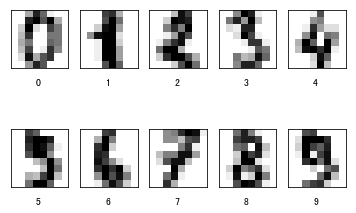

In [473]:
for i in range(1,11):
    # plt.subplot(nrows,ncols,index)
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [474]:
# 将数据集划分成训练集和测试集 为了进行交叉验证
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.25)

In [475]:
# 数据集中target < 5 的标签为 0 target >= 5 的标签为 1
y_train[y_train < 5] = 0
y_train[y_train >=5] = 1
y_test[y_test < 5] = 0
y_test[y_test >=5] = 1

In [476]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


In [477]:
!pwd

/Users/liyehong/Desktop/nlp/lession4


In [478]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1./(1 + np.exp(-1 * z))
    
    return s

In [479]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


In [480]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim).reshape(dim,1)
    b = np.random.randn(1)[0]
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

In [481]:
w = initialize_parameters(64)[0]
b = initialize_parameters(64)[1]

In [482]:
w

array([[-0.91488612],
       [ 0.03821245],
       [ 2.07568634],
       [ 0.57296611],
       [ 0.55169003],
       [-1.00491651],
       [ 1.02765352],
       [-1.23410526],
       [ 0.43872595],
       [ 1.60271013],
       [ 0.46995958],
       [ 0.37772142],
       [-1.04360882],
       [-1.43504987],
       [ 1.32259018],
       [ 0.12271954],
       [-1.07831362],
       [-0.19516145],
       [ 0.42269697],
       [ 0.79861275],
       [-0.37925178],
       [ 0.277754  ],
       [ 0.53276312],
       [-0.31077925],
       [-0.07977177],
       [-0.3168276 ],
       [-1.66956554],
       [-0.68821557],
       [ 1.57440279],
       [-1.37330158],
       [-0.26122682],
       [ 1.17177344],
       [ 0.30794762],
       [ 0.35009887],
       [ 1.10172762],
       [ 0.60246913],
       [-0.76563973],
       [-2.28065827],
       [ 0.73872338],
       [ 1.69944994],
       [ 0.23525388],
       [ 0.59123299],
       [-0.22778731],
       [-0.36846234],
       [-1.08474008],
       [-0

In [483]:
b

-0.6073603382917366

In [518]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    m = X.shape[0]
    A = sigmoid(np.dot(X,w) - b)
    cost = - sum([np.log(a[0])*y+np.log(1-a[0])*(1-y) for a,y in zip(A,Y) if a[0]*(1-a[0]) != 0]) / m
    
    dw = np.dot(X.T,A - Y.reshape(-1,1)) / m
    db = np.sum(A - Y.reshape(-1,1)) / m
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
#     cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

In [519]:
propagate(w,b,X_train,y_train)

({'dw': array([[ 0.00000000e+00],
         [ 1.06969008e-01],
         [ 2.82688533e-01],
         [-9.55989585e-01],
         [-1.93263918e+00],
         [-1.84025287e+00],
         [-6.80450835e-01],
         [-9.47373166e-02],
         [ 2.76352972e-03],
         [ 3.54659891e-01],
         [-1.17097313e+00],
         [-1.50388214e+00],
         [-8.31401685e-01],
         [-1.84555396e+00],
         [-7.00123591e-01],
         [-6.57443415e-02],
         [ 2.96956199e-03],
         [-8.29082403e-02],
         [-2.10612600e+00],
         [-3.68093921e-01],
         [ 6.22707506e-01],
         [-1.57518379e+00],
         [-5.32561830e-01],
         [-1.22394797e-02],
         [ 1.22106929e-03],
         [-4.14402060e-01],
         [-2.54345571e+00],
         [-1.43728004e+00],
         [-8.91046843e-01],
         [-2.37510949e+00],
         [-6.77702362e-01],
         [ 2.49248634e-13],
         [ 0.00000000e+00],
         [-3.08168469e-01],
         [-1.90688274e+00],
         [-1.3

In [523]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

In [527]:
optimize(w,b,X_train,y_train,15000,0.01,print_cost=False)

Cost after iteration 0: 9.461106
Cost after iteration 100: 4.055157
Cost after iteration 200: 2.785972
Cost after iteration 300: 2.059960
Cost after iteration 400: 1.592216
Cost after iteration 500: 1.311050
Cost after iteration 600: 1.123412
Cost after iteration 700: 0.976650
Cost after iteration 800: 0.874648
Cost after iteration 900: 0.800534
Cost after iteration 1000: 0.743168
Cost after iteration 1100: 0.695658
Cost after iteration 1200: 0.654571
Cost after iteration 1300: 0.618281
Cost after iteration 1400: 0.585871
Cost after iteration 1500: 0.556645
Cost after iteration 1600: 0.530071
Cost after iteration 1700: 0.505776
Cost after iteration 1800: 0.483505
Cost after iteration 1900: 0.463072
Cost after iteration 2000: 0.444328
Cost after iteration 2100: 0.427150
Cost after iteration 2200: 0.411426
Cost after iteration 2300: 0.397056
Cost after iteration 2400: 0.383946
Cost after iteration 2500: 0.372010
Cost after iteration 2600: 0.361166
Cost after iteration 2700: 0.351330
Cost

({'w': array([[-9.14886115e-01],
         [-2.92110090e-01],
         [ 9.58767330e-02],
         [-6.60155670e-03],
         [ 6.68595474e-02],
         [ 7.09204239e-02],
         [ 2.42465252e-01],
         [-1.69903938e-01],
         [ 6.33632426e-01],
         [-1.32228853e-01],
         [ 1.06380946e-01],
         [ 1.36033950e-01],
         [-6.55524608e-02],
         [-5.00175321e-02],
         [ 3.48525482e-02],
         [ 3.18079248e-01],
         [-1.15521640e+00],
         [ 9.14804314e-02],
         [ 1.23160949e-01],
         [-5.03275239e-02],
         [-2.39396531e-01],
         [-3.97507566e-02],
         [-1.74869245e-01],
         [-5.65150882e-01],
         [-1.69059784e-01],
         [-2.44184403e-01],
         [ 7.49926756e-02],
         [ 1.88466250e-01],
         [ 5.45811159e-02],
         [ 1.67593432e-01],
         [-1.39038198e-01],
         [ 1.14346215e+00],
         [ 3.07947616e-01],
         [-2.35925117e-01],
         [-3.69626154e-02],
         [ 2.30

In [656]:
def predict_(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
#     w = w.reshape(X.shape[1],1)
    
    A = sigmoid(np.dot(X,w) - b)
    
    for i in range(A.shape[0]):
        if A[i] > 0.5:
            Y_prediction[0][i] = 1
        else:
            Y_prediction[0][i] = 0
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

In [534]:
result = optimize(w,b,X_train,y_train,15000,0.01,print_cost=False)[0]

In [536]:
best_w = result['w']
best_b = result['b']

In [600]:
Y_test_predict = predict_(best_w,best_b,X_test)

In [609]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    # 初始化参数W，b
    initial_w,initial_b = initialize_parameters(X_train.shape[1])
    # 训练 使损失函数cost达到收敛 输出最好的w,b,最小的cost
    train_result = optimize(initial_w,initial_b,X_train,Y_train,num_iterations,learning_rate,print_cost=print_cost)
    best_w = train_result[0]['w']
    best_b = train_result[0]['b']
    best_cost = train_result[-1][-1]
    # 用最优的参数分别预测Y_train_predict,Y_test_predict
    Y_train_predict = predict_(best_w,best_b,X_train)
    Y_test_predict = predict_(best_w,best_b,X_test)
    # 计算训练集和测试集预测结果的准确性
    Y_train = Y_train.reshape(1,-1)
    Y_test = Y_test.reshape(1,-1)
    training_accuracy = Y_train[Y_train_predict == Y_train].shape[0] / Y_train.shape[1]
    test_accuracy = Y_test[Y_test_predict == Y_test].shape[0] / Y_test.shape[1]
    
    d = {
        "w":best_w,
        "b":best_b,
        "training_accuracy":training_accuracy,
        "test_accuracy":test_accuracy,
        "cost":best_cost
    }
    
    return d

In [715]:
model(X_train,y_train,X_test,y_test,15000,0.001,True)

Cost after iteration 0: 32.195912
Cost after iteration 100: 5.885693
Cost after iteration 200: 4.772781
Cost after iteration 300: 4.543212
Cost after iteration 400: 4.433788
Cost after iteration 500: 4.289104
Cost after iteration 600: 3.981862
Cost after iteration 700: 3.713165
Cost after iteration 800: 3.381266
Cost after iteration 900: 3.103321
Cost after iteration 1000: 2.859600
Cost after iteration 1100: 2.666177
Cost after iteration 1200: 2.537910
Cost after iteration 1300: 2.438792
Cost after iteration 1400: 2.307069
Cost after iteration 1500: 2.271485
Cost after iteration 1600: 2.165546
Cost after iteration 1700: 2.098322
Cost after iteration 1800: 2.013750
Cost after iteration 1900: 1.937732
Cost after iteration 2000: 1.895970
Cost after iteration 2100: 1.860512
Cost after iteration 2200: 1.856394
Cost after iteration 2300: 1.802677
Cost after iteration 2400: 1.752245
Cost after iteration 2500: 1.705763
Cost after iteration 2600: 1.662488
Cost after iteration 2700: 1.622086
Cos

{'w': array([[-1.62303695],
        [ 0.66371745],
        [-0.1004464 ],
        [ 0.11994437],
        [-0.18291646],
        [ 0.73644189],
        [ 0.57876364],
        [ 0.70680018],
        [-0.76669109],
        [ 0.07700472],
        [-0.10040096],
        [-0.19174405],
        [ 0.14605898],
        [-0.39601661],
        [-0.64589148],
        [-1.03949407],
        [-0.61729451],
        [ 0.187068  ],
        [ 0.70326699],
        [-0.06512263],
        [-0.69595136],
        [ 0.1510663 ],
        [ 0.3897169 ],
        [-1.42200238],
        [ 0.88221947],
        [-0.74374362],
        [-0.00880759],
        [ 0.44788985],
        [ 0.18683253],
        [ 0.18468501],
        [-0.30448349],
        [-0.55185753],
        [-1.13205022],
        [-1.56476182],
        [ 0.44686278],
        [ 0.3089803 ],
        [-0.0043647 ],
        [-0.18887402],
        [ 0.25335949],
        [ 0.27947312],
        [-1.91494044],
        [ 0.21142282],
        [-0.12996837],
      

### 选做题 4.1

In [824]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression

In [853]:
cost_list_r1 = optimize(w,b,X_train,y_train,20000,0.001,print_cost=True)[2]

Cost after iteration 0: 9.461106
Cost after iteration 100: 6.715161
Cost after iteration 200: 6.280916
Cost after iteration 300: 5.952880
Cost after iteration 400: 5.654160
Cost after iteration 500: 5.390241
Cost after iteration 600: 5.004627
Cost after iteration 700: 4.694730
Cost after iteration 800: 4.394628
Cost after iteration 900: 4.297960
Cost after iteration 1000: 4.059754
Cost after iteration 1100: 3.837469
Cost after iteration 1200: 3.699296
Cost after iteration 1300: 3.558466
Cost after iteration 1400: 3.439229
Cost after iteration 1500: 3.311702
Cost after iteration 1600: 3.170817
Cost after iteration 1700: 3.042315
Cost after iteration 1800: 2.950229
Cost after iteration 1900: 2.865640
Cost after iteration 2000: 2.787101
Cost after iteration 2100: 2.687293
Cost after iteration 2200: 2.593375
Cost after iteration 2300: 2.504439
Cost after iteration 2400: 2.421031
Cost after iteration 2500: 2.369392
Cost after iteration 2600: 2.295062
Cost after iteration 2700: 2.224469
Cost

In [855]:
cost_list_r2 = optimize(w,b,X_train,y_train,20000,0.003,print_cost=True)[2]

Cost after iteration 0: 9.461106
Cost after iteration 100: 5.951046
Cost after iteration 200: 5.003089
Cost after iteration 300: 4.296816
Cost after iteration 400: 3.698431
Cost after iteration 500: 3.311234
Cost after iteration 600: 2.949906
Cost after iteration 700: 2.687062
Cost after iteration 800: 2.420864
Cost after iteration 900: 2.224367
Cost after iteration 1000: 2.060171
Cost after iteration 1100: 1.894051
Cost after iteration 1200: 1.751980
Cost after iteration 1300: 1.629507
Cost after iteration 1400: 1.521635
Cost after iteration 1500: 1.451944
Cost after iteration 1600: 1.364326
Cost after iteration 1700: 1.312324
Cost after iteration 1800: 1.241583
Cost after iteration 1900: 1.178925
Cost after iteration 2000: 1.123136
Cost after iteration 2100: 1.073247
Cost after iteration 2200: 1.028590
Cost after iteration 2300: 0.988671
Cost after iteration 2400: 0.952997
Cost after iteration 2500: 0.920974
Cost after iteration 2600: 0.892077
Cost after iteration 2700: 0.865889
Cost

In [856]:
cost_list_r3 = optimize(w,b,X_train,y_train,20000,0.01,print_cost=True)[2]

Cost after iteration 0: 9.461106
Cost after iteration 100: 4.055157
Cost after iteration 200: 2.785972
Cost after iteration 300: 2.059960
Cost after iteration 400: 1.592216
Cost after iteration 500: 1.311050
Cost after iteration 600: 1.123412
Cost after iteration 700: 0.976650
Cost after iteration 800: 0.874648
Cost after iteration 900: 0.800534
Cost after iteration 1000: 0.743168
Cost after iteration 1100: 0.695658
Cost after iteration 1200: 0.654571
Cost after iteration 1300: 0.618281
Cost after iteration 1400: 0.585871
Cost after iteration 1500: 0.556645
Cost after iteration 1600: 0.530071
Cost after iteration 1700: 0.505776
Cost after iteration 1800: 0.483505
Cost after iteration 1900: 0.463072
Cost after iteration 2000: 0.444328
Cost after iteration 2100: 0.427150
Cost after iteration 2200: 0.411426
Cost after iteration 2300: 0.397056
Cost after iteration 2400: 0.383946
Cost after iteration 2500: 0.372010
Cost after iteration 2600: 0.361166
Cost after iteration 2700: 0.351330
Cost

In [857]:
cost_list_r4 = optimize(w,b,X_train,y_train,20000,0.03,print_cost=True)[2]

Cost after iteration 0: 9.461106
Cost after iteration 100: 2.059729
Cost after iteration 200: 1.124463
Cost after iteration 300: 0.801500
Cost after iteration 400: 0.655470
Cost after iteration 500: 0.715515
Cost after iteration 600: 0.564876
Cost after iteration 700: 0.734490
Cost after iteration 800: 0.471796
Cost after iteration 900: 1.621160
Cost after iteration 1000: 0.434246
Cost after iteration 1100: 0.509647
Cost after iteration 1200: 0.483500
Cost after iteration 1300: 0.428535
Cost after iteration 1400: 0.621125
Cost after iteration 1500: 0.417821
Cost after iteration 1600: 0.503713
Cost after iteration 1700: 0.423101
Cost after iteration 1800: 0.392011
Cost after iteration 1900: 0.797221
Cost after iteration 2000: 0.394779
Cost after iteration 2100: 0.558868
Cost after iteration 2200: 0.426560
Cost after iteration 2300: 0.387160
Cost after iteration 2400: 0.567115
Cost after iteration 2500: 0.434395
Cost after iteration 2600: 0.389332
Cost after iteration 2700: 0.377559
Cost

In [858]:
cost_list_r5 = optimize(w,b,X_train,y_train,20000,0.1,print_cost=True)[2]

Cost after iteration 0: 9.461106
Cost after iteration 100: 3.284994
Cost after iteration 200: 1.522525
Cost after iteration 300: 1.046821
Cost after iteration 400: 6.479229
Cost after iteration 500: 1.133054
Cost after iteration 600: 9.982452
Cost after iteration 700: 1.090387
Cost after iteration 800: 5.894066
Cost after iteration 900: 1.099152
Cost after iteration 1000: 1.911028
Cost after iteration 1100: 1.094678
Cost after iteration 1200: 1.353730
Cost after iteration 1300: 1.113021
Cost after iteration 1400: 1.240040
Cost after iteration 1500: 1.608490
Cost after iteration 1600: 1.169333
Cost after iteration 1700: 5.671138
Cost after iteration 1800: 1.083827
Cost after iteration 1900: 7.664609
Cost after iteration 2000: 1.081686
Cost after iteration 2100: 3.458312
Cost after iteration 2200: 1.088402
Cost after iteration 2300: 2.152754
Cost after iteration 2400: 1.100897
Cost after iteration 2500: 1.582230
Cost after iteration 2600: 1.093931
Cost after iteration 2700: 1.394700
Cost

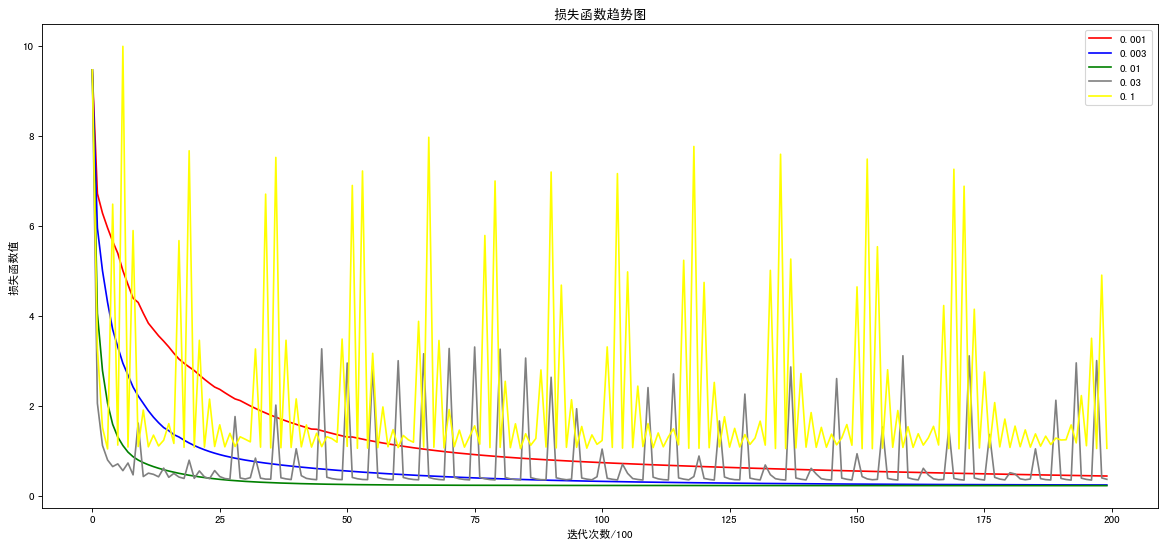

In [865]:
plt.figure(num=1,figsize=(18,8),dpi=80)
plt.title("损失函数趋势图")
plt.xlabel("迭代次数/100")
plt.ylabel("损失函数值")
plt.plot(list(range(200)),cost_list_r1,color='red',label='0.001')
plt.plot(list(range(200)),cost_list_r2,color='blue',label='0.003')
plt.plot(list(range(200)),cost_list_r3,color='green',label='0.01')
plt.plot(list(range(200)),cost_list_r4,color='gray',label='0.03')
plt.plot(list(range(200)),cost_list_r5,color='yellow',label='0.1')
plt.legend()

In [ ]:
# 从上图损失函数的收敛趋势图可以看出，当learning_rate <= 0.01时，学习率越大收敛速度越快，当学习率为0.01时损失函数最先达到收敛
# 当学习率大于0.01时，如learning_rate = 0.03时，损失函数无法达到收敛，并在损失函数最小值附近小幅度波动，而当learning_rate为
# 0.1时，损失函数发散，发生较大范围波动，因此选择0.01作为learing_rate时效果最好

### 选做题4.2

In [880]:
def get_score(iters):
    num_iterations_list = []
    test_sccracy_list = []
    for i in range(1,iters,50):
        result = model(X_train,y_train,X_test,y_test,i,0.01,True)
        test_accuracy = result['test_accuracy']
        num_iterations_list.append(i)
        test_sccracy_list.append(test_accuracy)
    return num_iterations_list , test_sccracy_list

In [895]:
num_iterations_list,test_sccracy_list = get_score(2000)

Cost after iteration 0: 8.122411
Cost after iteration 0: 7.362664
Cost after iteration 0: 4.591304
Cost after iteration 100: 2.836819
Cost after iteration 0: 1.534954
Cost after iteration 100: 2.778695
Cost after iteration 0: 8.238475
Cost after iteration 100: 3.747618
Cost after iteration 200: 2.407674
Cost after iteration 0: 39.698856
Cost after iteration 100: 4.870144
Cost after iteration 200: 2.441689
Cost after iteration 0: 4.991287
Cost after iteration 100: 3.906355
Cost after iteration 200: 2.127380
Cost after iteration 300: 1.593112
Cost after iteration 0: 31.826242
Cost after iteration 100: 2.400974
Cost after iteration 200: 1.643749
Cost after iteration 300: 1.312743
Cost after iteration 0: 39.052250
Cost after iteration 100: 3.126422
Cost after iteration 200: 1.914115
Cost after iteration 300: 1.430447
Cost after iteration 400: 1.161770
Cost after iteration 0: 11.923464
Cost after iteration 100: 4.710313
Cost after iteration 200: 2.840152
Cost after iteration 300: 2.055076
C

Cost after iteration 1000: 0.678428
Cost after iteration 1100: 0.641391
Cost after iteration 1200: 0.608951
Cost after iteration 1300: 0.579856
Cost after iteration 1400: 0.553370
Cost after iteration 0: 55.370708
Cost after iteration 100: 3.595206
Cost after iteration 200: 1.614647
Cost after iteration 300: 1.234424
Cost after iteration 400: 1.054158
Cost after iteration 500: 0.940034
Cost after iteration 600: 0.854601
Cost after iteration 700: 0.787253
Cost after iteration 800: 0.732193
Cost after iteration 900: 0.685370
Cost after iteration 1000: 0.644145
Cost after iteration 1100: 0.606964
Cost after iteration 1200: 0.572890
Cost after iteration 1300: 0.541349
Cost after iteration 1400: 0.511975
Cost after iteration 1500: 0.484538
Cost after iteration 0: 1.322292
Cost after iteration 100: 3.965861
Cost after iteration 200: 2.656172
Cost after iteration 300: 2.059440
Cost after iteration 400: 1.695516
Cost after iteration 500: 1.416876
Cost after iteration 600: 1.204165
Cost after i

In [896]:
num_iterations_list

[1,
 51,
 101,
 151,
 201,
 251,
 301,
 351,
 401,
 451,
 501,
 551,
 601,
 651,
 701,
 751,
 801,
 851,
 901,
 951,
 1001,
 1051,
 1101,
 1151,
 1201,
 1251,
 1301,
 1351,
 1401,
 1451,
 1501,
 1551,
 1601,
 1651,
 1701,
 1751,
 1801,
 1851,
 1901,
 1951]

In [897]:
test_sccracy_list

[0.5266666666666666,
 0.6022222222222222,
 0.7088888888888889,
 0.7688888888888888,
 0.7755555555555556,
 0.7511111111111111,
 0.7933333333333333,
 0.8244444444444444,
 0.8244444444444444,
 0.8088888888888889,
 0.8266666666666667,
 0.8022222222222222,
 0.8533333333333334,
 0.8355555555555556,
 0.8466666666666667,
 0.8355555555555556,
 0.8533333333333334,
 0.8222222222222222,
 0.84,
 0.8244444444444444,
 0.8533333333333334,
 0.8355555555555556,
 0.86,
 0.8444444444444444,
 0.84,
 0.8488888888888889,
 0.8666666666666667,
 0.8422222222222222,
 0.8422222222222222,
 0.8555555555555555,
 0.84,
 0.8377777777777777,
 0.8555555555555555,
 0.8488888888888889,
 0.8466666666666667,
 0.8466666666666667,
 0.8666666666666667,
 0.8422222222222222,
 0.8622222222222222,
 0.8577777777777778]

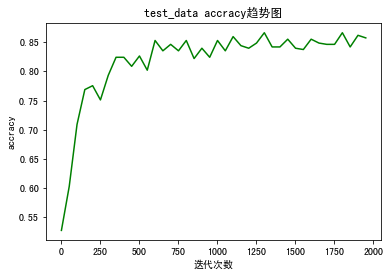

In [898]:
plt.title("test_data accracy趋势图")
plt.xlabel("迭代次数")
plt.ylabel("accracy")
plt.plot(num_iterations_list,test_sccracy_list,color='green')

In [899]:
# 一开始随着迭代次数的增加，test_data的accuracy明显上升，迭代次数达到600次后，test_data accuracy达到了85%左右，
# 然后随着迭代次数增加，accuracy没有明显变化，均在85%左右浮动，之后再增加迭代次数也没有明显的效果，这时候需要增加效果
# 便不能再单单靠增加迭代次数，而是要去优化模型

In [900]:
# class My_LogisticRegression():
#     def __init__(self):
        
#         self.w = np.random.randn(64).reshape(64,1)
#         self.b = np.random.randn(1)[0]        
        
#     def get_params(self, deep=True):
#         out = {
#             'w':self.w,
#             'b':self.b,
#             'num_iterations':self.num_iterations,
#             'learning_rate':self.learning_rate,
#             'print_cost':self.print_cost
#         }
        
#         return out
    
#     def fit(self,X_train,Y_train,num_iterations=10000,learning_rate=0.001,print_cost=True):
        
#         self.num_iterations = num_iterations
#         self.learning_rate = learning_rate
#         self.print_cost = print_cost
        
#         result = optimize(self.w,self.b,X_train,Y_train,self.num_iterations,self.learning_rate,self.print_cost)[0]
        
#         self.w = result['w']
#         self.b = result['b']
        
#         return self
    
#     def predict(self,X_test):
        
#         m = X_test.shape[0]
#         Y_prediction = np.zeros(m)
        
#         A = sigmoid(np.dot(X_test,self.w) - self.b)
        
#         for i in range(A.shape[0]):
#             if A[i] > 0.5:
#                 Y_prediction[i] = 1
#             else:
#                 Y_prediction[i] = 0
            
#         return Y_prediction
    
#     def score(self,X,y,sample_weight=None):
        
#         from sklearn.metrics import r2_score
#         return r2_score(y, self.predict(X), sample_weight=sample_weight)